# Start with differentiation of 1 and 7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from IPython.display import display
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits

# load data set
digits = load_digits()

digitData = digits["data"]
digitImages = digits["images"]
digitTarget = digits["target"]
digitTarget_names = digits["target_names"]

def printLoop( *targets ):
    for target in target:
        print(targets.shape, targets.dtype)


printLoop(digitData)
printLoop(digitImages)
printLoop(digitTarget)
print(digitTarget[:50])
printLoop(digitTarget_names)
print(digitTarget_names)

(1797, 64) float64
(1797, 8, 8) float64
(1797,) int32 [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
(10,) int32 [0 1 2 3 4 5 6 7 8 9]


## Split into ones and sevens

In [2]:
onesIndexes = np.where(target==1) 
sevensIndexes = np.where(target==7) 
ones = data[onesIndexes,:] 
sevens = data[sevensIndexes,:]

data_set = np.concatenate((ones,sevens),axis=1)[0,:,:] 

# target/label set
target_ones = np.full(len(onesIndexes[0]), 1)
target_sevens = np.full(len(sevensIndexes[0]), 7)
target_set = np.concatenate((np.full(len(onesIndexes[0]), 1), np.full(len(sevensIndexes[0]), 7)))

data_set.shape

(361, 64)

### For interest explore datasets:

(1, 182, 64) (1, 179, 64)
(64,) (64,)
19 10


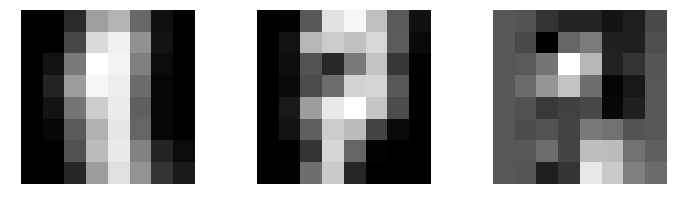

In [4]:
# Create average one/seven
summed1 = np.sum(ones[0], axis=0)/len(onesIndexes[0])
summed7 = np.sum(sevens[0], axis=0)/len(sevensIndexes[0])
print(summed1.shape, summed7.shape)

# For interest: difference between averages
diff = summed1-summed7 

#Returns indices of max/min value
maxPx = np.argmax(diff) # Pixel index where one is brightest compared to seven
minPx = np.argmin(diff) # Pixel index where seven is brightest compared to one

summed1Img = np.reshape(summed1, (8,8))
summed7Img = np.reshape(summed7, (8,8))
diff_img = np.reshape(diff, (8,8))

#Display average and negative images
fig = plt.figure(figsize = (10,3))
plt.gray()
plt.subplot('131'); plt.axis('off')
plt.imshow(summed1Img, interpolation = "nearest")
plt.subplot('132'); plt.axis('off')
plt.imshow(summed7Img, interpolation = "nearest")
plt.subplot('133'); plt.axis('off')
plt.imshow(diff_img, interpolation = "nearest")

fig.tight_layout(); plt.show()

#Indices of max/min value
maxPx = np.argmax(diff) # 
minPx = np.argmin(diff) # 
print("Pixel index where one is brightest compared to seven: " + str(maxPx))
print( "Pixel index where seven is brightest compared to one" + str(minPx))
print( "Brightest pixel shows biggest difference, so most important indicator" )

### Creating training and test sets

In [ ]:
# Create training and test sets
X_train, X_test, y_train , y_test = model_selection.train_test_split(
                                    data_set,
                                    target_set,
                                    test_size = 0.4, # corresponds to train/test = 3/2
                                    random_state = 0)
printLoop(X_train.shape)
printLoop(X_test.shape)
printLoop(y_train.shape)
printLoop(y_test.shape)
print(y_train[:50])

#### Dimension reduction for a reduced training and feature space

In [ ]:
# Reduces the data of each image to only two values:
# Values for Pixel 10 & 19
def reduced_dim(instances):
    return np.array([instances[:,min_px], instances[:,max_px]]) #instaces.shape : (#instances, 64)

# From now on: Treat only values of Pixel 10 & 19 as relevant for distinction between 1 and 7
# -> reduce data/dim of data sets
reduced_test = reduced_dim(X_test)
reduced_train = reduced_dim(X_train)
reduced_data = reduced_dim(data_set)
print(reduced_train.shape, reduced_test.shape)

In [ ]:
# Calculate mean values of px 10 & 19 of 1s and 7s
# in order to display them in the scatter plot
reduced_train = reduced_dim(X_train)

ones_x_mean = np.mean(reduced_train[0,np.where(y_train==1)]) # Mean value for Pixel 10 of all 1s
ones_y_mean = np.mean(reduced_train[1,np.where(y_train==1)]) # Mean value for Pixel 19 of all 1s
sevens_x_mean = np.mean(reduced_train[0,np.where(y_train==7)]) # Mean value for Pixel 10 of all 7s
sevens_y_mean = np.mean(reduced_train[1,np.where(y_train==7)]) # Mean value for Pixel 19 of all 7s